In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

## Linear Regression
##### This notebook aims to predict where the ISS would be located some time after the last recording, using Linear Regression.

In [104]:
# Reading data in
ISS_locations_df = pd.read_csv(r'/home/stefanie/Python/Find_ISS/Find_ISS/ISS_locations.csv')
ISS_locations_df

,timestamp,latitude,longitude
0,2022-04-11 20:59:33,-34.4130,2.9362
1,2022-04-11 21:00:33,-36.9134,6.3313
2,2022-04-11 21:01:33,-39.2942,9.9669
3,2022-04-11 21:02:33,-41.5185,13.8343
4,2022-04-11 21:03:33,-43.6022,18.0200
...,...,...,...
86,2022-04-11 22:25:32,-15.2545,-39.2972
87,2022-04-11 22:26:32,-18.1845,-36.9443
88,2022-04-11 22:27:32,-21.1021,-34.4821
89,2022-04-11 22:28:32,-23.9745,-31.9120


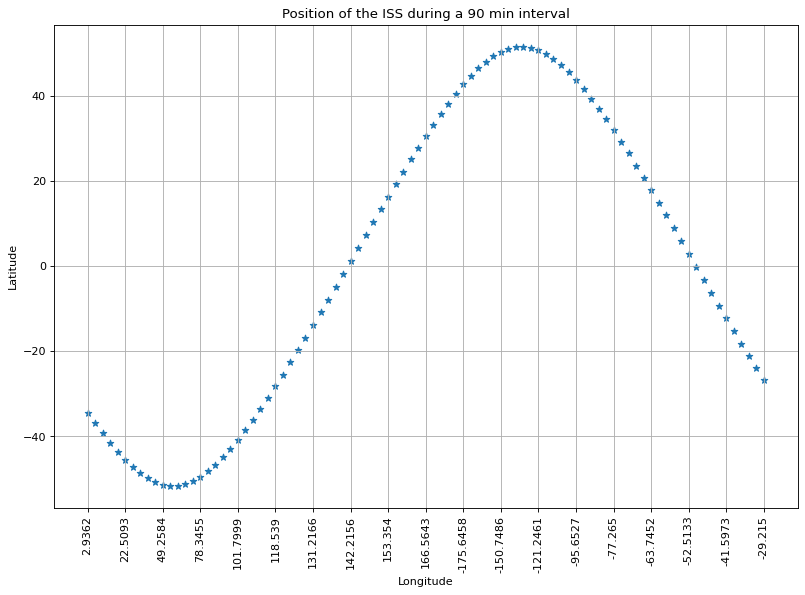

In [97]:
# Plotting the recorded values
plt.figure(figsize=(12, 8), dpi=80)
plt.title('Position of the ISS during a 90 min interval')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.xticks(np.arange(0, 180, step=5), rotation=90) 
plt.scatter(ISS_locations_df['longitude'].astype(str), ISS_locations_df['latitude'], marker=('*'))

Since the data isn't really suited for linear regression (sinus curve like behavior), we need to select the last 20 values for the model training.

In [115]:
# Cutting the df down to the last 20 rows
latest_ISS_locations_df = ISS_locations_df.iloc[-20:,]
latest_ISS_locations_df         

,timestamp,latitude,longitude
71,2022-04-11 22:10:32,29.2300,-74.2611
72,2022-04-11 22:11:32,26.4851,-71.4496
73,2022-04-11 22:12:32,23.6551,-68.7617
74,2022-04-11 22:13:32,20.7722,-66.1999
75,2022-04-11 22:14:32,17.8460,-63.7452
76,2022-04-11 22:15:32,14.9089,-61.3984
77,2022-04-11 22:16:32,11.9184,-59.1034
78,2022-04-11 22:17:32,8.9056,-56.8642
79,2022-04-11 22:18:32,5.9023,-54.6845
80,2022-04-11 22:19:32,2.8634,-52.5133


### Training Linear Regression Model

In [125]:
# Training process
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x = latest_ISS_locations_df['longitude'],
    y = latest_ISS_locations_df['latitude'])

print('intercept: ', intercept)
print('slope: ', slope)

intercept:  -65.55312488388493
slope:  -1.2970407632741427


In [129]:
# Predicting longitude 1 periods out
predicted_latitude = np.ceil(slope * -26.8 + intercept)
print('Predicted position after 1 minute: longitude=', predicted_latitude, ', latitude = -26.8')

# Predicting longitude 10 periods out 
predicted_latitude = np.ceil(slope * -5.21 + intercept)
print('Predicted position after 10 minutes: longitude=', predicted_latitude, ', latitude = -5.21')


Predicted position after 1 minute: longitude= -30.0 , latitude = -26.8
Predicted position after 10 minutes: longitude= -58.0 , latitude = -5.21


Comment: For better predictions we would have to identify the latutudes after 1 and 10 minutes as a function of time before (also applying a regression model).